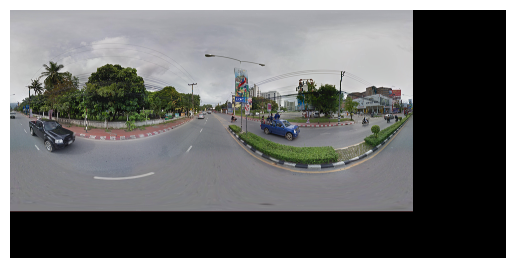

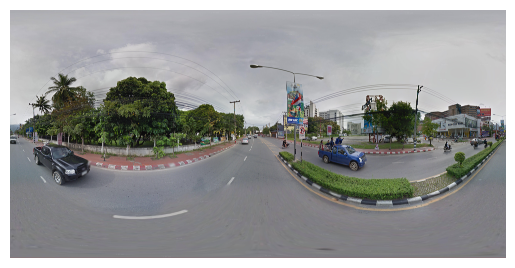

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from ultralytics import YOLO
import random

# Set up paths
dataDir = os.path.join(os.getcwd(), 'YOLODataset')
trainImagePath = os.path.join(dataDir, 'train', 'images')
yamlFilePath = os.path.join(dataDir, 'dataset.yaml')

# Load model
model = YOLO('yolov8n-seg.pt')

# Training configuration
results = model.train(
    data=yamlFilePath,
    epochs=10,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device='cpu',  # Use 'cuda' for GPU
    seed=42,
    project=os.getcwd(), 
    name='model' 
)

# Load the best model saved during training
model = YOLO(os.path.join(results.save_dir, 'best.pt'))

# Predict on new images
testImagePath = os.path.join(dataDir, 'test', 'images')
testImages = [os.path.join(testImagePath, f) for f in os.listdir(testImagePath) if f.endswith('.jpg')]

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()




Ultralytics YOLOv8.2.6 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M2)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/YOLODataset/dataset.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv, name=MyTrainingRun, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

RuntimeError: Dataset '/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/YOLODataset/dataset.yaml' error ❌ 
Dataset '/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/YOLODataset/dataset.yaml' images not found ⚠️, missing path '/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/YOLODataset/valid/images'
Note dataset download directory is '/opt/homebrew/datasets'. You can update this in '/Users/sakdahomhuan/Library/Application Support/Ultralytics/settings.yaml'